<a href="https://colab.research.google.com/github/Soham1729/AML/blob/main/prepare_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Applied ML  - Assignment 1
## <center> Soham Pyne (MDS202148) <br><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import seaborn as sb
import pickle as pkl
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score
import nltk

#### Defining the filepath

In [2]:
filepath = '/Users/Soham/Documents/CMI-SEM-4/Applied ML/smsspamcollection/SMSSpamCollection'

In [3]:
data =pd.read_csv(filepath, sep="\t", header=None, on_bad_lines='skip', names=["Classification", "Message"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  5572 non-null   object
 1   Message         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isnull().sum()
data = data.drop_duplicates(keep = 'first')

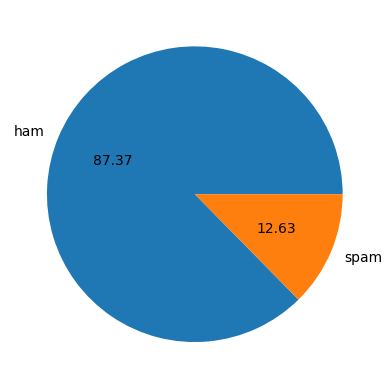

In [6]:
import matplotlib.pyplot as plt
plt.pie(data['Classification'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [7]:
x = data.Message
y = data.Classification

In [8]:
y.replace(to_replace = 'ham', value = 1, inplace = True)
y.replace(to_replace = 'spam', value = 0, inplace = True)

In [9]:
y.value_counts()

1    4516
0     653
Name: Classification, dtype: int64

### Preprocessing the dataset using NLP ideas

In [11]:
data.loc[:, 'num_char'] = data['Message'].apply(len)

In [12]:
data.loc[:, 'num_word'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
data.loc[:, 'num_sentence'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [14]:
data.head()

,Classification,Message,num_char,num_word,num_sentence
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Figure size 3000x1000 with 0 Axes>

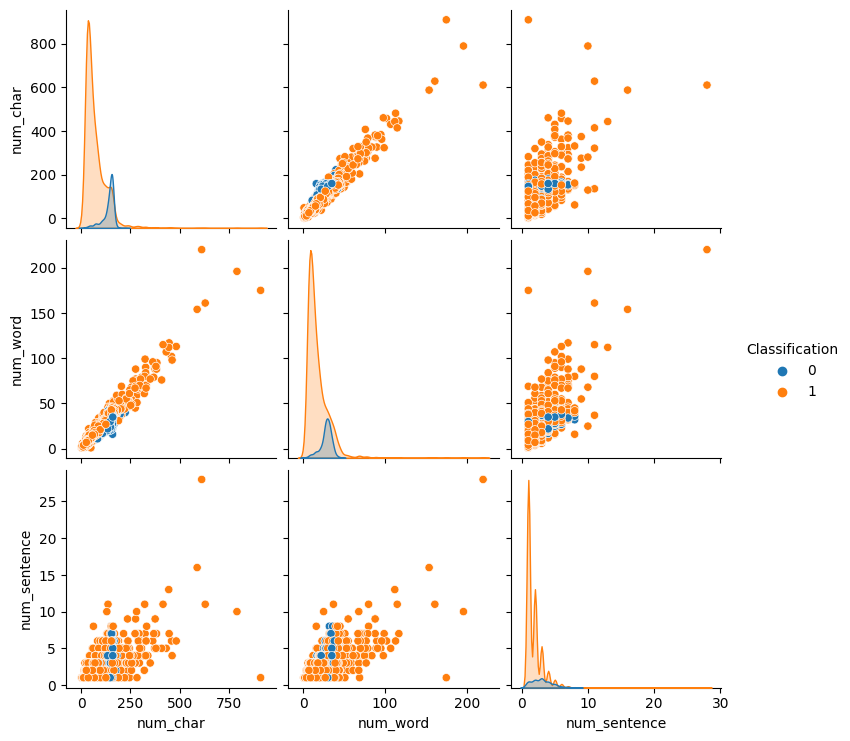

In [15]:
plt.figure(figsize = (30,10))
sns.pairplot(data, hue = 'Classification')

In [16]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [17]:
def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    
    meaningful_instances = []
    
    for i in words:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            meaningful_instances.append(i)
            
    final_text = []
    
    for i in meaningful_instances:
        final_text.append(ps.stem(i))
        
    return " ".join(final_text)    

In [18]:
data.loc[:, 'transformed_text'] = data['Message'].apply(preprocess_text)

In [19]:
data.head(5)

,Classification,Message,num_char,num_word,num_sentence,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Saving the data to csv format

In [20]:
data.to_csv('data_preprocessed.csv', index = False)

In [21]:
x = data["transformed_text"]
y = data["Classification"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

In [23]:
X_train.to_csv('X_train.csv', index = False)
X_val.to_csv('X_val.csv', index = False)
x_test.to_csv('x_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_val.to_csv('y_val.csv', index = False)

## Tf-idf method for Logistic regression model

In [24]:
Bag_of_words = CountVectorizer()
Bag_of_words.fit(X_train)

CountVectorizer()

In [25]:
train_vocab = Bag_of_words.vocabulary_

x_train_bow = Bag_of_words.transform(X_train)
x_val_bow = Bag_of_words.transform(X_val)
x_test_bow = Bag_of_words.transform(x_test)

len(train_vocab), x_train_bow.shape, x_val_bow.shape, x_test_bow.shape

(5017, (3101, 5017), (1034, 5017), (1034, 5017))

In [26]:
tfidf_transformer = TfidfTransformer().fit(x_train_bow)

x_train_tf = tfidf_transformer.transform(x_train_bow)
x_val_tf = tfidf_transformer.transform(x_val_bow)
x_test_tf = tfidf_transformer.transform(x_test_bow)

x_train_tf.shape, x_val_tf.shape, x_test_tf.shape

((3101, 5017), (1034, 5017), (1034, 5017))

In [27]:
def logisticregression_model(x_test_tf,y_test):
    
    Log = LogisticRegression()
    Log.fit(x_train_tf,y_train)
    log_pre = Log.predict(x_test_tf)
    print(f'accuracy of Logistic Regression : {Log.score(x_test_tf,y_test)} ')
    print(f'F1 score of Logistic Regression : {f1_score(y_test,log_pre)} ')
    print('confusion_matrix is \n',confusion_matrix(y_test,log_pre))
    print('precision_score = ',precision_score(y_test,log_pre))
    print('Recall score: {}'.format(recall_score(y_test,log_pre)))

In [28]:
logisticregression_model(x_test_tf,y_test)

accuracy of Logistic Regression : 0.9545454545454546 
F1 score of Logistic Regression : 0.9742465753424658 
confusion_matrix is 
 [[ 98  42]
 [  5 889]]
precision_score =  0.9548872180451128
Recall score: 0.9944071588366891


In [29]:
def svm_model(x_test_tf,y_test):
    sv = SVC()
    sv.fit(x_train_tf,y_train)
    sv_pre = sv.predict(x_test_tf)
    print(f'accuracy of SVM : {sv.score(x_test_tf,y_test)} ')
    print(f'F1 score of SVM : {f1_score(y_test,sv_pre)} ')
    print('confusion_matrix is \n',confusion_matrix(y_test,sv_pre))
    print('precision_score = ',precision_score(y_test,sv_pre))
    print('Recall score: {}'.format(recall_score(y_test,sv_pre)))

In [30]:
svm_model(x_test_tf,y_test)

accuracy of SVM : 0.9748549323017408 
F1 score of SVM : 0.9856512141280354 
confusion_matrix is 
 [[115  25]
 [  1 893]]
precision_score =  0.9727668845315904
Recall score: 0.9988814317673378


### SVM perfoms the best among the models. We use it for the testing function in assignment three


In [49]:
# save the model to disk

bag_of_words_filename = '/Users/Soham/Documents/CMI-SEM-4/AML/Assignment_three/bow.sav'
tfidf_file_name = '/Users/Soham/Documents/CMI-SEM-4/AML/Assignment_three/tfidf.sav'
svm_model_filename = '/Users/Soham/Documents/CMI-SEM-4/AML/Assignment_three/svm_model.sav'
preprocess_text_filename =  '/Users/Soham/Documents/CMI-SEM-4/AML/Assignment_three/preprocess_text.sav'

pkl.dump(Bag_of_words, open(bag_of_words_filename, 'wb'))
pkl.dump(tfidf_transformer, open(tfidf_file_name, 'wb'))
pkl.dump(svm_model, open(svm_model_filename, 'wb'))
pkl.dump(preprocess_text, open(preprocess_text_filename, 'wb'))


## Corpus builder using spam and ham data

In [ ]:
spam_corpus=[]
for i in data[data['Classification']== 0]['transformed_text'].tolist():
    for j in i.split():
        spam_corpus.append(j)
len(spam_corpus)

9982

In [ ]:
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(50))

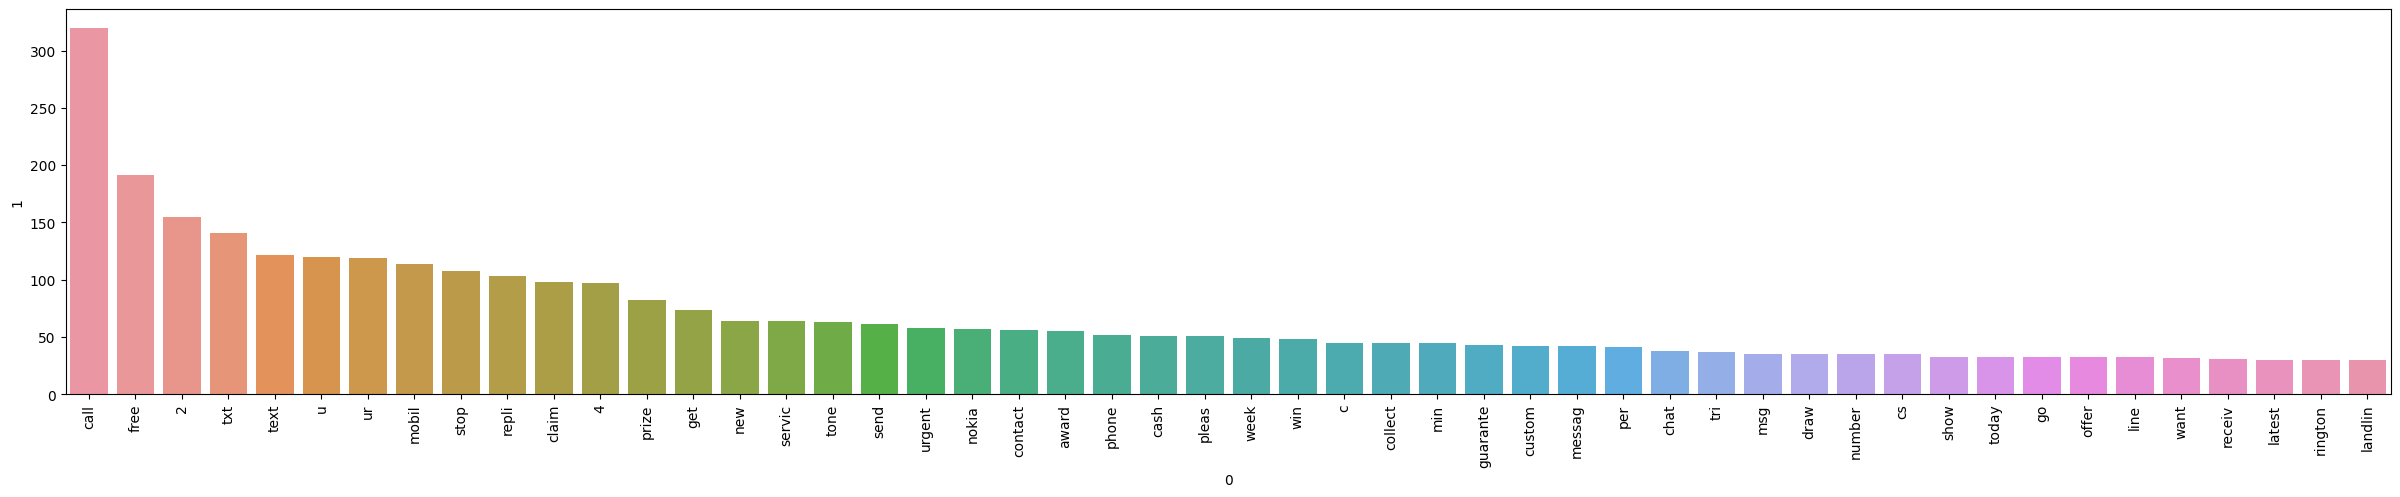

In [ ]:
plt.figure(figsize = (30,5))
sns.barplot(data = df_spam , x = df_spam[0], y = df_spam[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus=[]
for i in data[data['Classification']== 1]['transformed_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)
len(ham_corpus)

35929

In [ ]:
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(50))

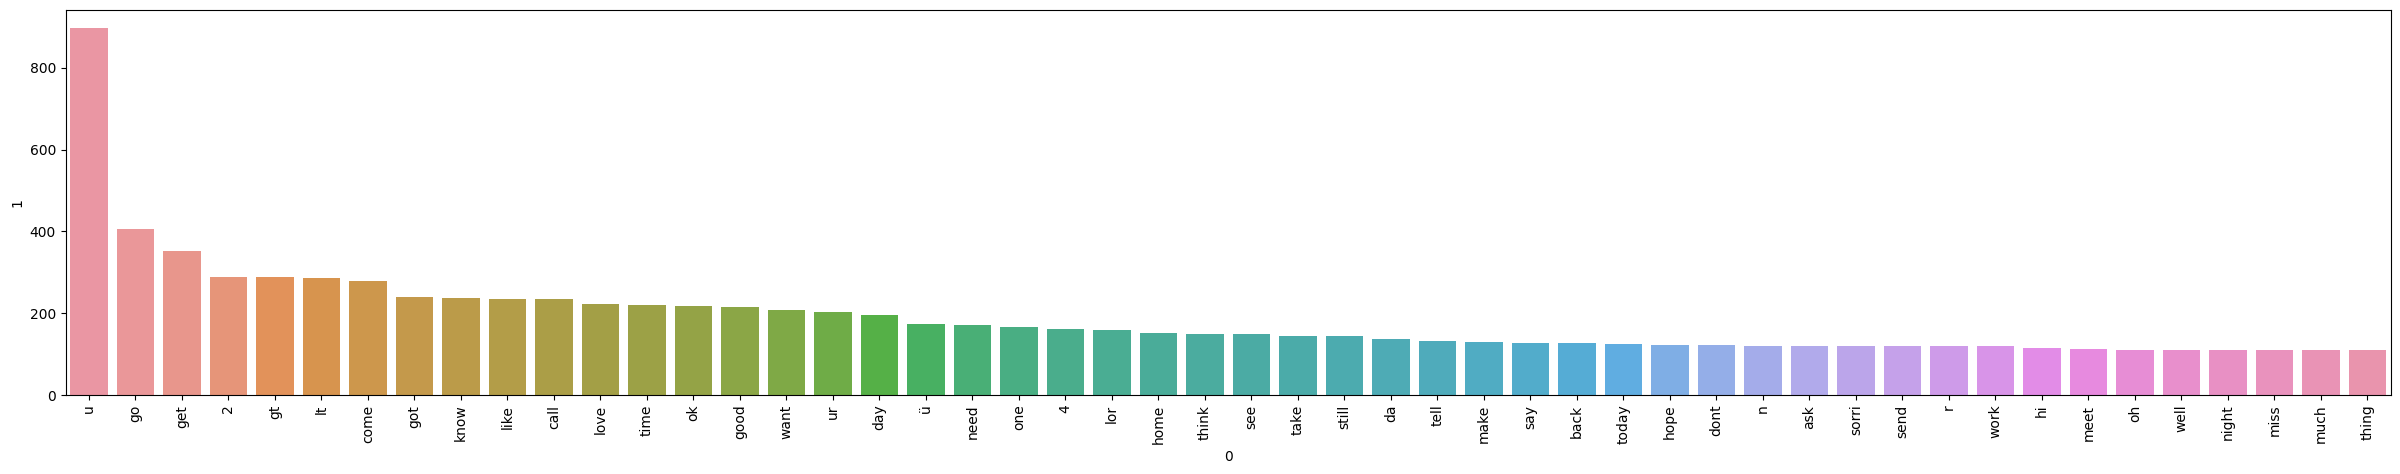

In [ ]:
plt.figure(figsize = (30,5))
sns.barplot(data = df_ham , x = df_ham[0], y = df_ham[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [ ]:
x = cv.fit_transform(data['transformed_text']).toarray()
y = data['Classification'].values

In [ ]:
x.shape,y.shape

((5169, 6782), (5169,))

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

## Naive Bayes Classifiers

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb= GaussianNB()     #Gaussian Naive Bayes
mnb=MultinomialNB()   #Multinomial Naive Bayes
bnb=BernoulliNB()     #Bernoulli Naive Bayes

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(x_test)
print('accuracy score = ',accuracy_score(y_test,y_pred1))
print('confusion_matrix is \n',confusion_matrix(y_test,y_pred1))
print('precision_score = ',precision_score(y_test,y_pred1))
print('Recall score: {}'.format(recall_score(y_test, y_pred1)))
print('F1 score: {}'.format(f1_score(y_test, y_pred1)))

accuracy score =  0.8820116054158608
confusion_matrix is 
 [[124  16]
 [106 788]]
precision_score =  0.9800995024875622
Recall score: 0.8814317673378076
F1 score: 0.9281507656065958


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(x_test)
print('accuracy score = ',accuracy_score(y_test,y_pred2))
print('confusion_matrix is \n',confusion_matrix(y_test,y_pred2))
print('precision_score = ',precision_score(y_test,y_pred2))
print('Recall score: {}'.format(recall_score(y_test, y_pred2)))
print('F1 score: {}'.format(f1_score(y_test, y_pred2)))

accuracy score =  0.971953578336557
confusion_matrix is 
 [[130  10]
 [ 19 875]]
precision_score =  0.9887005649717514
Recall score: 0.8814317673378076
F1 score: 0.9281507656065958


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(x_test)
print('accuracy score = ',accuracy_score(y_test,y_pred3))
print('confusion_matrix is \n',confusion_matrix(y_test,y_pred3))
print('precision_score = ',precision_score(y_test,y_pred3))
print('Recall score: {}'.format(recall_score(y_test, y_pred3)))
print('F1 score: {}'.format(f1_score(y_test, y_pred3)))

accuracy score =  0.9680851063829787
confusion_matrix is 
 [[109  31]
 [  2 892]]
precision_score =  0.9664138678223185
Recall score: 0.9977628635346756
F1 score: 0.9818381948266373
